# Instructions:

1. Download data set, Global Terrorism Database, from https://www.kaggle.com/START-UMD/gtd
2. Take a quick look at the data set. Check what's inside, how the data is structured, and where the data is corrupted (missing values, bad structure, etc).
3. Think and create 5 questions to the data. Try to ask yourself what's really interesting in the data set. What's not so obvious. E.g. some trends, patterns, correlations.
4. Create a jupyter notebook and use python, numpy, pandas, matplotlib (at least) to provide all the answers to your questions.
5. Create a new github repository, and put your jupyter notebook there.
6. Create readme.md file as well in your github root directory with all necessary instructions (what is in the repo, what libs are necessary to run the code, where to find data set and where to save it  - this is necessary because the dataset is too big for github repo).
7. Provide the necessary documentation and introduction in your notebook using markdown language, at least: data source description, data structure, importing process, data processing process.
8. Put some data visualization in your notebook. Sometimes it's much easier to present the answer using a chart rather than numbers
9. Check if your notebook run smoothly - use 'Reset & Run All' command from the menu. Save it.
10. Export the notebook as HTML as well, and save the file in the repo.
11. Do not forget to commit/push all the changes to your repo on hithub.
12. Smile :) You did a good job!

FAQ:
1. Can I take a look at different solution provided at kaggle?  Yes, you can. But check more than one solution. Try to understand what the authors are trying to solve, and how could it be used in your project. Try to find really good examples - easy to understand and not so complicated. Remember - you create the notebook as an instruction to someone else! Try to not complicate the process.
2. Can I take a look at my friend's solution, that he/she has just put on github? Yes, you can. But it's the smart way of solving the project. I'm sure that you want to be smarter in the next semester - so try to create a better solution and your own one :)
3. Jupyter notebook provide R kernel, so can I use R instead? Nope, R sucks. Even if you love R, try to solve the project using Python.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from itertools import cycle, islice

path = 'globalterrorismdb_0718dist.csv'
data_set = pd.read_csv(path, encoding='ISO-8859-1')


data_set.rename(columns = {'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'CountryName','country':'Country', 'region':'RegionId',
                            'region_txt':'Region', 'provstate':'Province', 'summary':'Summary', 'suicide':'Suicide',
                             'attacktype1':'TypeId', 'attacktype1_txt':'Type', 'targtype1':'TargetId',
                                'targtype1_txt':'Target_type', 'natlty1_txt':'Nationality', 'nkill':'Killed',
                                    'nwound':'Wounded'}, inplace=True)

filtered_data_set = data_set [['Year', 'Month', 'Day', 'CountryName', 'Country', 'RegionId', 'Region', 'Province', 'Summary',
                                 'Suicide', 'TypeId', 'Type', 'TargetId', 'Target_type', 'Nationality', 'Killed',
                                    'Wounded','success']]


/home/wisnj/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Attacks per year
=============
Lets start with the easy one that can be foud anyware.

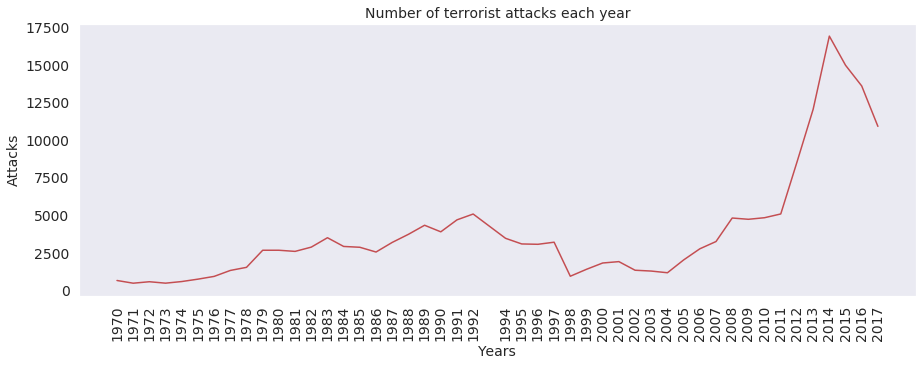

In [2]:
att_per_year = pd.DataFrame({'Year':filtered_data_set['Year'].unique(), 'Freq': filtered_data_set['Year'].value_counts().sort_index()})

sbn.set()
plt.subplots(figsize=(15,5))
sbn.lineplot(x='Year', y='Freq', data=att_per_year, palette='inferno', color='r')
plt.xticks(att_per_year['Year'], rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Attacks', fontsize=14)
plt.title('Number of terrorist attacks each year', fontsize=14)
plt.grid()
plt.show()

Most popular Targets 
=======

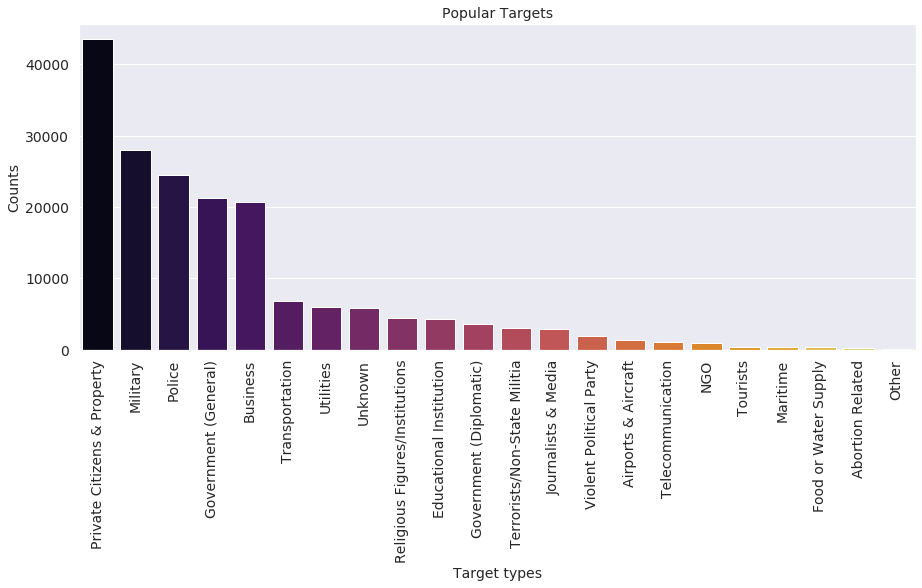

In [3]:
plt.subplots(figsize=(15,6))
sbn.countplot(filtered_data_set['Target_type'],
              palette='inferno',
              order=filtered_data_set['Target_type'].value_counts().index)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Target types', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Popular Targets', fontsize=14)
plt.show()

Types
=====

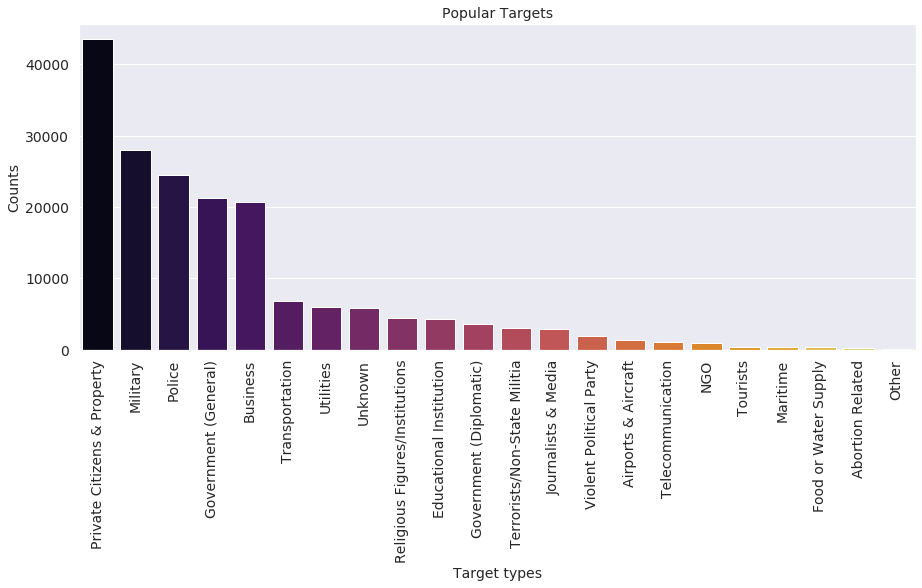

In [4]:
plt.subplots(figsize=(15,6))
sbn.countplot(filtered_data_set['Target_type'],
              palette='inferno',
              order=filtered_data_set['Target_type'].value_counts().index)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Target types', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Popular Targets', fontsize=14)
plt.show()

Success rate of all terrorist attacks
=============================

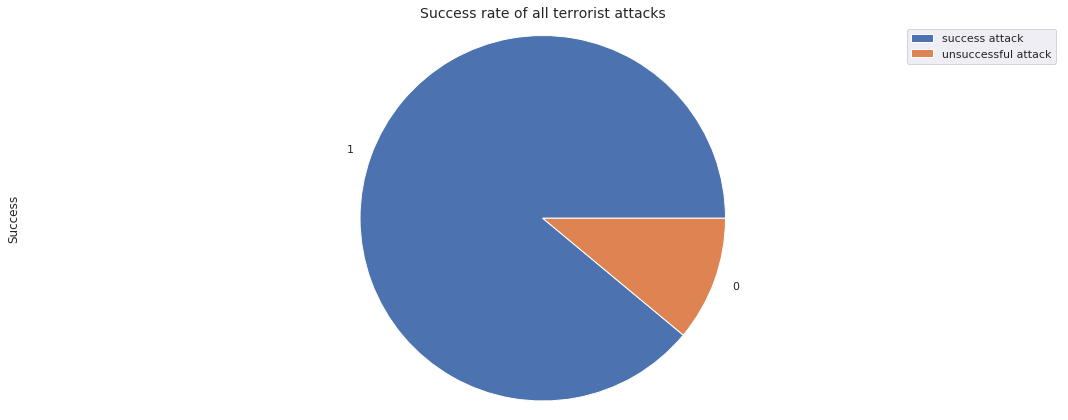

In [5]:
success = pd.DataFrame({'Success':filtered_data_set['success']})

plt.subplots(figsize=(15,6))
pd.value_counts(success['Success']).plot(kind='pie')
plt.title('Success rate of all terrorist attacks', fontsize=14)
labels = [r'success attack', r'unsuccessful attack']

plt.legend( labels, loc="best")
plt.axis('equal')
plt.tight_layout()

# plt.grid()
# plt.show()


Attack types ratio in Regions
========================

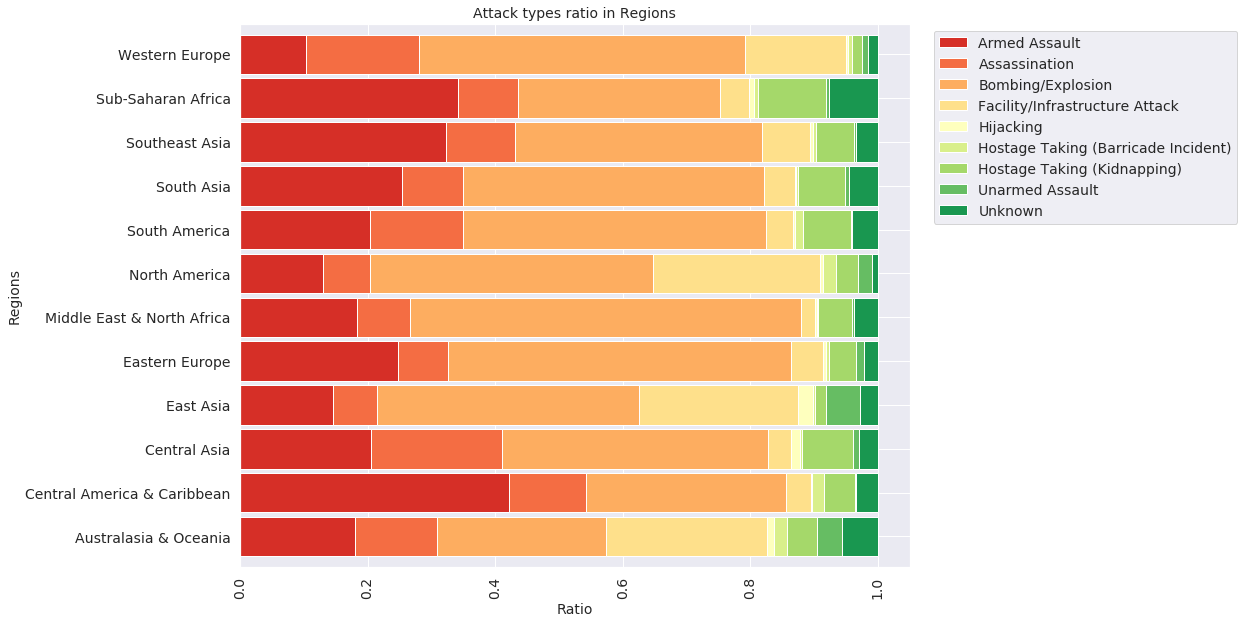

In [6]:
pd.crosstab(filtered_data_set['Region'], filtered_data_set['Type'], normalize='index')\
.plot.barh(stacked=True, width=0.9, color=sbn.color_palette('RdYlGn',9), fontsize=13)

fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Regions', fontsize=14)
plt.xlabel('Ratio', fontsize=14)
plt.title('Attack types ratio in Regions', fontsize=14)
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

Attack Success ratio in regions
==========================

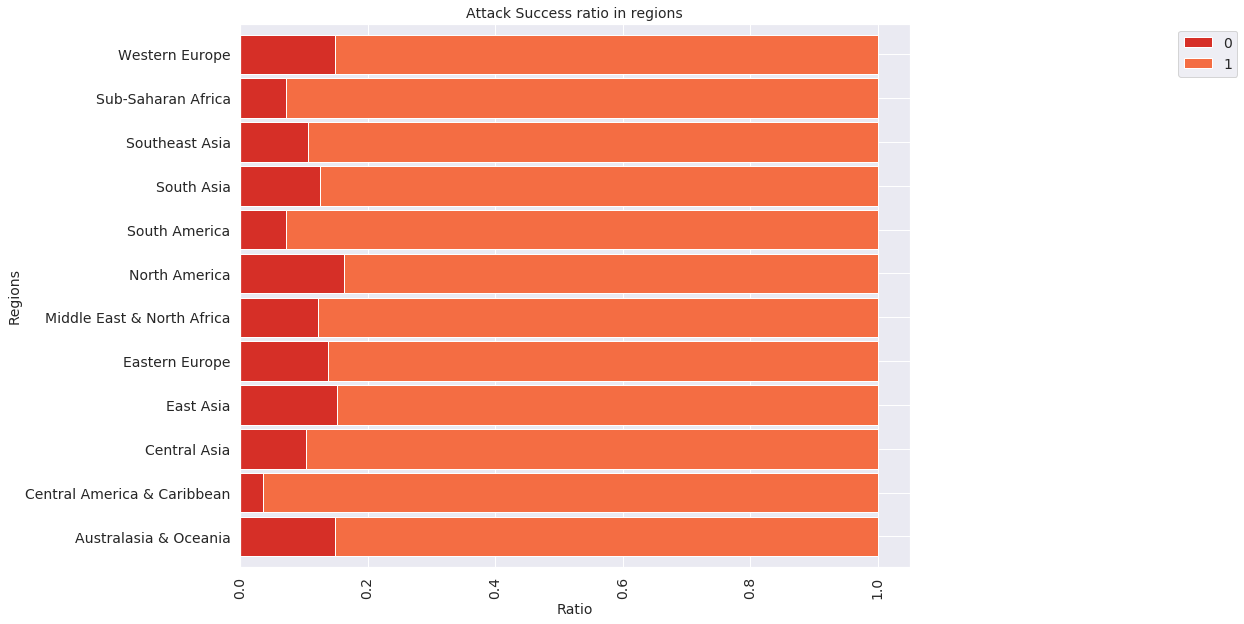

In [7]:
pd.crosstab(filtered_data_set['Region'], filtered_data_set['success'], normalize='index')\
.plot.barh(stacked=True, width=0.9, color=sbn.color_palette('RdYlGn',9), fontsize=13)

fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Regions', fontsize=14)
plt.xlabel('Ratio', fontsize=14)
plt.title('Attack Success ratio in regions', fontsize=14)
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

Attact vs killed in different attacks types
=================================

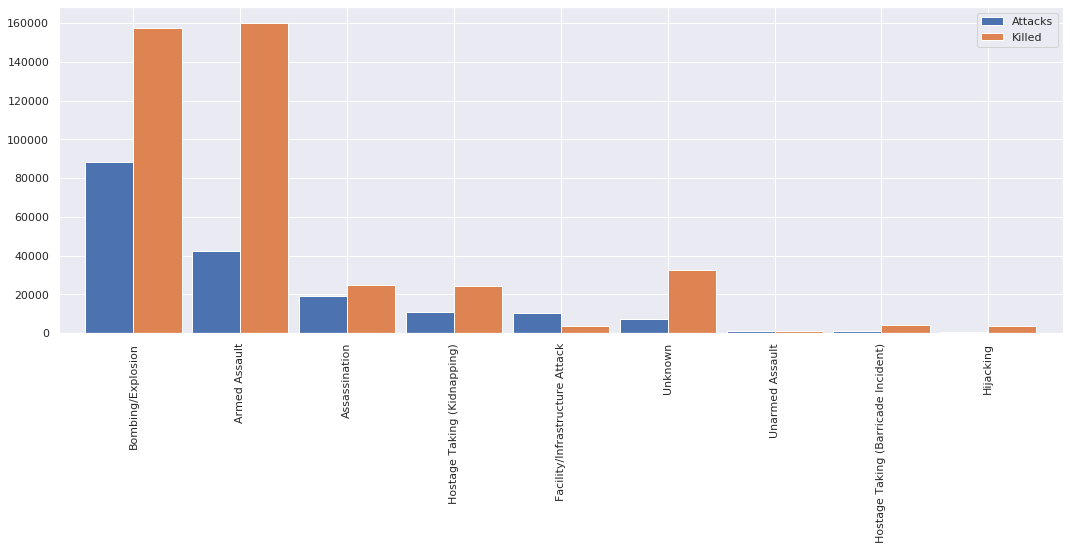

In [9]:
coun_terror=filtered_data_set['Type'].value_counts().to_frame()
coun_terror.columns=['Attacks']
coun_kill=filtered_data_set.groupby('Type')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()